In [1]:
# Importamos librerias
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Parte 1

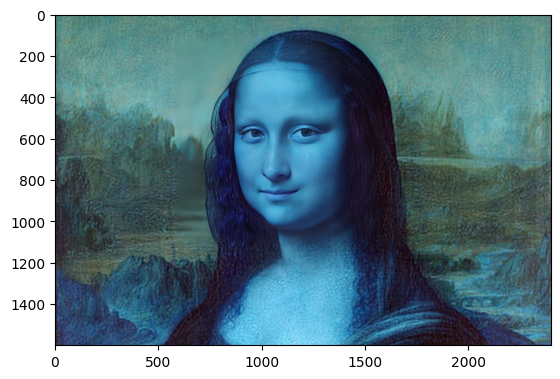

In [2]:
# cargamos imagen
img = cv.imread('./7ARBKZBF3JDNLCJOS2BJEGT6WQ.png')
plt.imshow(img)

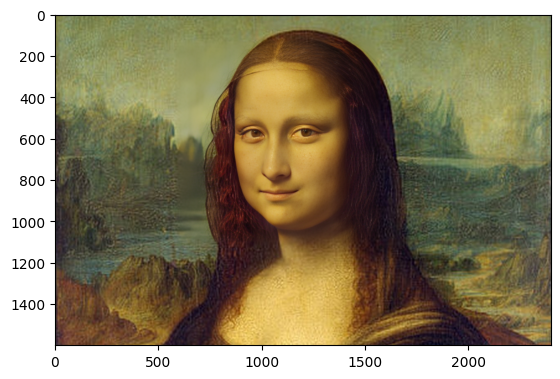

In [3]:
# acomodando colores
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [4]:
# Image size
h,w,_ = img_rgb.shape
print(f"Dimensiones de la imagen: {h} x {w}")

Dimensiones de la imagen: 1600 x 2400


Text(0.5, 1.0, 'Imgen con Desenfoque')

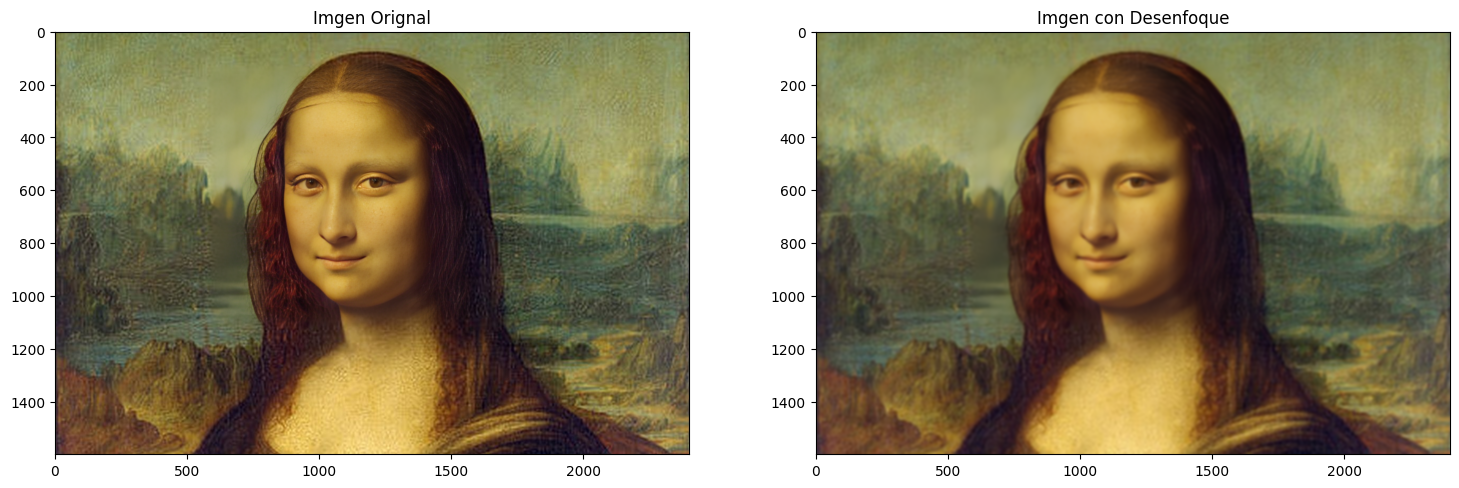

In [5]:
# filtro espacial con gauss (desenfoque)
f_espacial = cv.GaussianBlur(img_rgb, ksize=(17, 17), sigmaX=5)

figure = plt.figure(figsize=(18,18))
ax1 = plt.subplot(221)
plt.imshow(img_rgb)
plt.title("Imgen Orignal")

ax2 = plt.subplot(222)
plt.imshow(f_espacial)
plt.title("Imgen con Desenfoque")


In [6]:
# Para crear filtros gaussianos en el dom espectral
def create_gauss_filter(h, w, k_size, sigma):
    # Pasos:
    ## Generar el kernel en el dom espacial
    kernel_xy = cv.getGaussianKernel(k_size, sigma)
    kernel = kernel_xy * kernel_xy.T

    ## Agregar padding de ceros para llevar el kernel a la dim de h x w
    # Calcular la cantidad de padding necesaria
    pad_height = (h - k_size)  // 2
    pad_width =  (w - k_size) // 2

    # hacemos matriz de ceros de dimensionses h x w
    kernel_padding = np.zeros((h,w))
    # hacemos el padding con el kernel, donde los valores del kernel deberían quedar en el medio
    kernel_padding[pad_height: pad_height + k_size, pad_width: pad_width + k_size] = kernel

    ## Luego aplicar la trans de fourier a eso
    # filtro gaussiano
    kernel_g = kernel_padding
    # creamos transf de fourier
    kernel_f = np.fft.fft2(kernel_g)

    return kernel_g, kernel_f

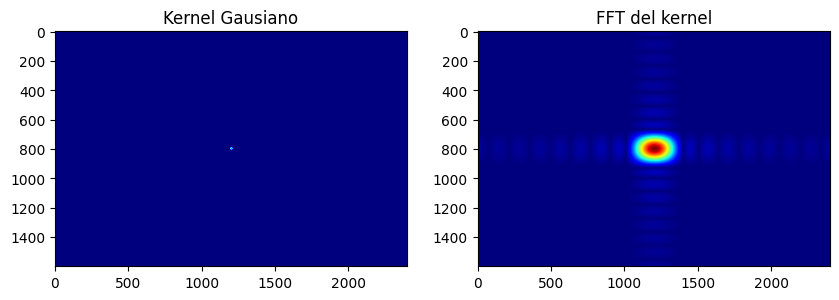

In [7]:
kernel, kernel_tf = create_gauss_filter(h, w, k_size=17, sigma=5)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title("Kernel Gausiano")
plt.imshow(kernel, cmap='jet')

plt.subplot(222)
plt.title("FFT del kernel")
tf_shifted = np.fft.fftshift(kernel_tf)
plt.imshow(np.abs(tf_shifted), cmap='jet')

**Analisis**

De salida de la funcion create_gauss_filter se obtuvo el kernel gaussiano como esta representado en la imagen anterior donde se observa como un punto pequeño y se obtuvo su transformada de fourier que tambien es una gaussiana pero en el dominio de la frecuencia.  

In [8]:
print(f"Tamaño de filtro gaussiano dom espacial: {kernel.shape}")
print(f"Tamaño de filtro gaussiano con tf: {kernel_tf.shape}")
print(f"Tamaño de la imagen original: {img_rgb.shape}")

Tamaño de filtro gaussiano dom espacial: (1600, 2400)
Tamaño de filtro gaussiano con tf: (1600, 2400)
Tamaño de la imagen original: (1600, 2400, 3)


Text(0.5, 1.0, 'Imagen con Desenfoque')

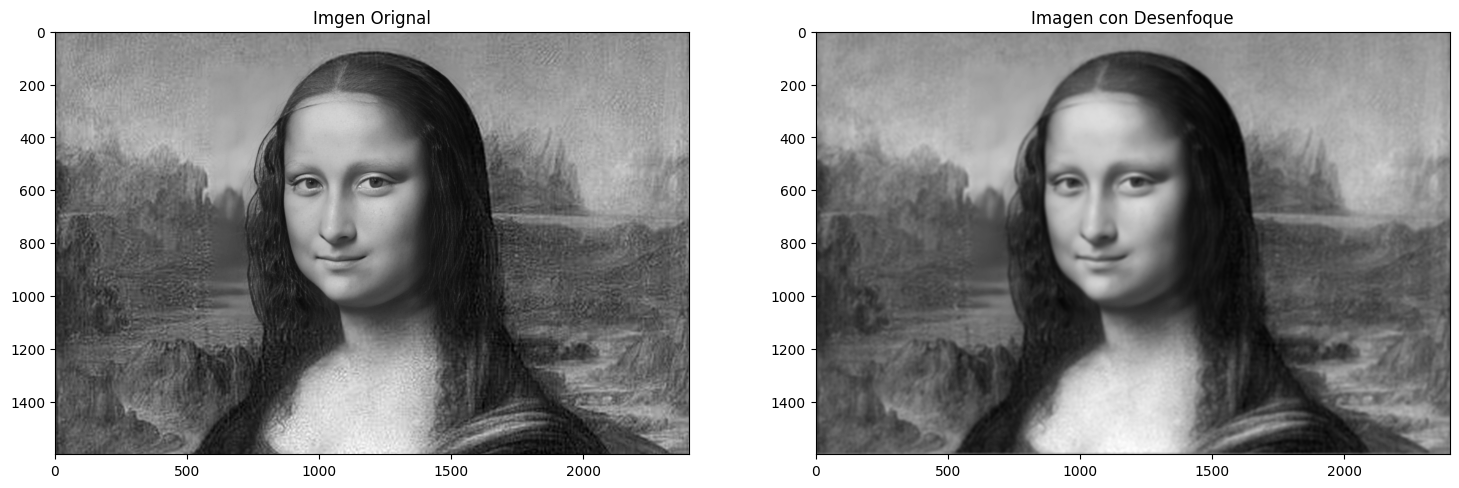

In [9]:
# converting image to grayscale
img_gray = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)

# aplicamos la trans fourier a la imagen y aplicamos filtro
img_fft = np.fft.fft2(img_gray)
filter_f = img_fft * kernel_tf

img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filter_f)))

plt.figure(figsize=(18,18))
ax1 = plt.subplot(221)
plt.imshow(img_gray, cmap='gray')
plt.title("Imgen Orignal")

ax2 = plt.subplot(222)
plt.imshow(img_gauss, cmap='gray')
plt.title("Imagen con Desenfoque")


**Analisis**

Aplicando el filtro gaussiano en dominio espectral a una imagen como se muestra en la figura anterior. Es posible observar el desenfoque que este le aplica a la imagen original.

Text(0.5, 1.0, 'Imagen con Gaussian Blur')

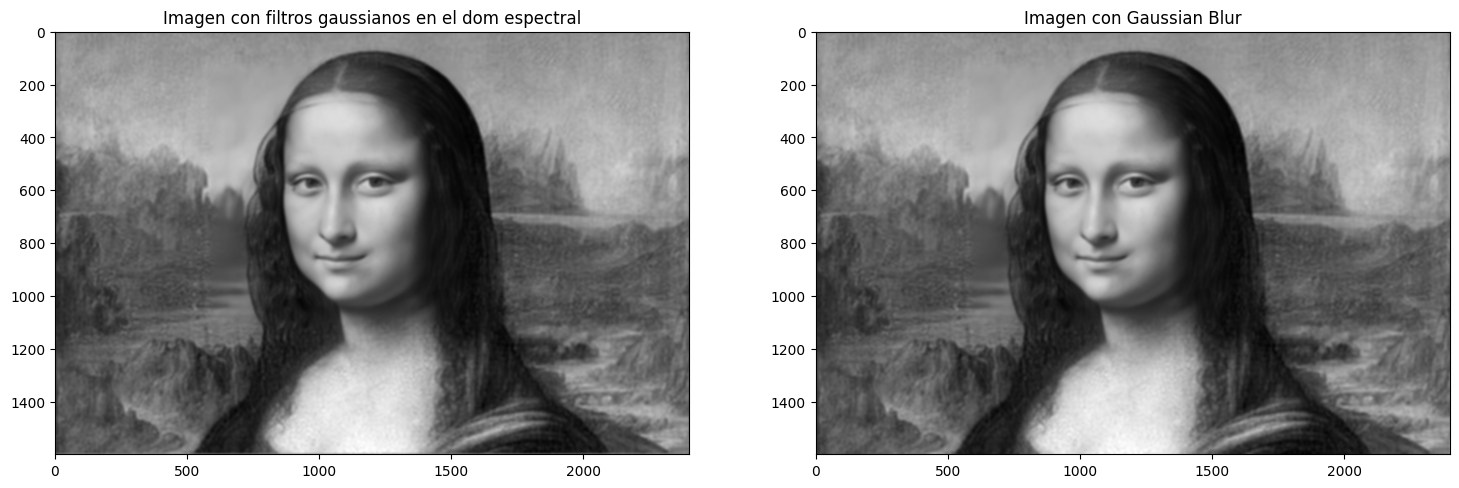

In [10]:
# Comprobamos de vuelta con gaussian blur
f_espacial = cv.GaussianBlur(img_gray, ksize=(17, 17), sigmaX=5)

plt.figure(figsize=(18,18))
ax3 = plt.subplot(221)
plt.imshow(img_gauss, cmap='gray')
plt.title("Imagen con filtros gaussianos en el dom espectral")

ax4 = plt.subplot(222)
plt.imshow(f_espacial, cmap='gray')
plt.title("Imagen con Gaussian Blur")

**Analisis**

Si comparamos desenfoque hecho por el filtro gaussiano en el dominio espectral con respecto al filtro gaussiano en el dominio espacial, notamos que ambos dan el mismo resultado para los mismos tamaños de kernel y de sigma.

#### Probamos distintos tamaños de kernel y sigma 

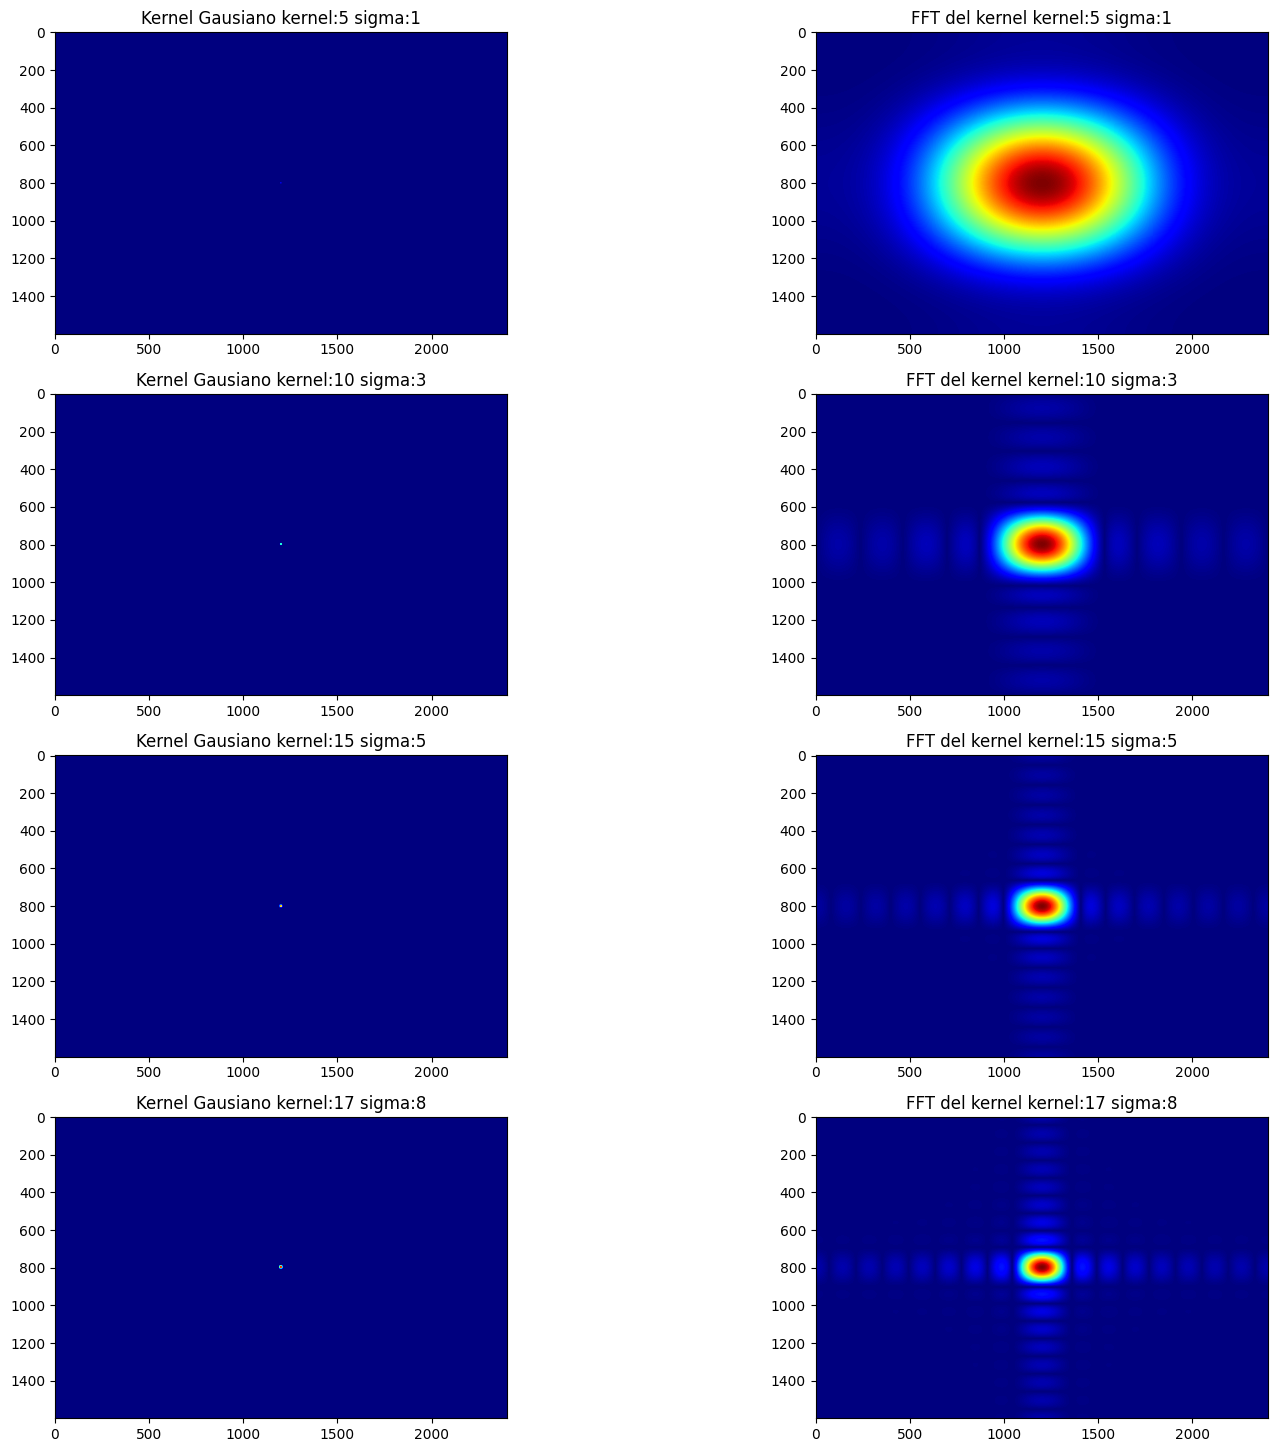

In [11]:
k_s = [5,10,15,17]
sig = [1,3,5,8]
plt.figure(figsize=(18,18))
for i in range (4):
    kernel, kernel_tf = create_gauss_filter(h, w, k_size=k_s[i], sigma=sig[i])
    
    if i == 0:
        plt.subplot(421)
        plt.title(f"Kernel Gausiano kernel:{k_s[i]} sigma:{sig[i]}")
        plt.imshow(kernel, cmap='jet')

        plt.subplot(422)
        plt.title(f"FFT del kernel kernel:{k_s[i]} sigma:{sig[i]}")
        tf_shifted = np.fft.fftshift(kernel_tf)
        plt.imshow(np.abs(tf_shifted), cmap='jet')
    elif i == 1:
        plt.subplot(423)
        plt.title(f"Kernel Gausiano kernel:{k_s[i]} sigma:{sig[i]}")
        plt.imshow(kernel, cmap='jet')

        plt.subplot(424)
        plt.title(f"FFT del kernel kernel:{k_s[i]} sigma:{sig[i]}")
        tf_shifted = np.fft.fftshift(kernel_tf)
        plt.imshow(np.abs(tf_shifted), cmap='jet')
    elif i == 2:
        plt.subplot(425)
        plt.title(f"Kernel Gausiano kernel:{k_s[i]} sigma:{sig[i]}")
        plt.imshow(kernel, cmap='jet')

        plt.subplot(426)
        plt.title(f"FFT del kernel kernel:{k_s[i]} sigma:{sig[i]}")
        tf_shifted = np.fft.fftshift(kernel_tf)
        plt.imshow(np.abs(tf_shifted), cmap='jet')
    else:
        plt.subplot(427)
        plt.title(f"Kernel Gausiano kernel:{k_s[i]} sigma:{sig[i]}")
        plt.imshow(kernel, cmap='jet')

        plt.subplot(428)
        plt.title(f"FFT del kernel kernel:{k_s[i]} sigma:{sig[i]}")
        tf_shifted = np.fft.fftshift(kernel_tf)
        plt.imshow(np.abs(tf_shifted), cmap='jet')

**Analisis**

Al aplicar distintos tamaños de kernel y de sigmas se nota un cambio en el tamaño del circulo del kernel gaussiano y en su transformada de fourier. Mientras disminuyen las dimensiones del kernels y el valor de sigma, mas pequeño se hace el circulo que representa el kernel gaussiano. Esto se debe a que ahora la densidad del kernel gaussiano esta bastante acotada, es decir, se aplasta la campana de gauss y todos los valores lejanos al centro de la distribución se hacen más cercanos a cero. 

Por otro lado, su transformada de fourier se nota como un circulo que incrementa su tamaño a medida que las dimensiones del kernel y el valor del sigma disminuyen. Esto se puede deber a que en el dominio de la frecuencia la campana de gauss se expande. 


## Parte 2